# Welcome to Quantum Floyd-Hoare Verification and its Implementations!

#### I am going to be giving today's presentation in two parts: the first on the fundamentals of Quantum Computing and the second on Quantum Floyd-Hoare Verification. The former will be used to help motivate why formal methods are needed for Quantum Computing, as well as why rigorous system verification can be difficult to accomplish with Quantum systems.

### So, what is Quantum Computing?

Quantum Computing is a multidisciplinary field that focuses on harnessing the power of Quantum Mechanics to compute and solve problems that have been thought to be unsolvable []. Some of the fields involved in Quantum Computing include Physics, Biology, Chemistry, Computer Science, Software Engineering, Electrical Engineering, and Mechanical Engineering. The Computer Science and Software Engineering research within Quantum Computing largely revolves around the creation and implementation of Quantum algorithms (which often are inspired by classical algorithms) as well as the creation of fault-tolerant Quantum Software.

This presentation will be given from a Computer Science and Software Engineering perspective. Most of the resources presented have been created by IBM Quantum Learning and IBM Research [], []. While there exists other Quantum Computing resources, IBM's resources and tools are some of the most popular in Quantum Computing right now and are often used to teach the fundamentals of Quantum Computing.

#### Please download the following libraries before trying to run any of the code below

```bash
   pip install qiskit
```
```bash
   pip install numpy
```
```bash
   pip install matplotlib
```

In [2]:
# Necessary imports
from qiskit import *
from qiskit.visualization import plot_histogram

### Qubits

Instead of using bits, Quantum Computers use Qubits. Qubits can exist as 0, 1, or a state in between 0 and 1.

In [2]:
# Used to simulate Quantum behaviour on classical 
# machines (running even the simplest code on real 
# Quantum Computers costs money!)

simulator = Aer.get_backend("qasm_simulator")

The code below creates a Quantum circuit that contains one qubit and one classical bit. No interesting Quantum behaviour has been added (yet)! The Qubit is measured into the classical bit after they are initialized.

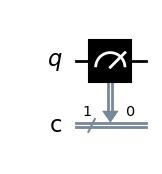

In [3]:

circuit = QuantumCircuit(1, 1)
circuit.measure(0, 0)
circuit.draw(output="mpl")

Due to NISQ quantum computers not being super reliable, it is common for Quantum programs to be run on a quantum computer many, many times (often 1000+ times). These runs are called 'shots'. After all shots have been completed, the programmer or scientist analyses them to see if a pattern can be seen.

Let's try running the circuit from above **1024** times!

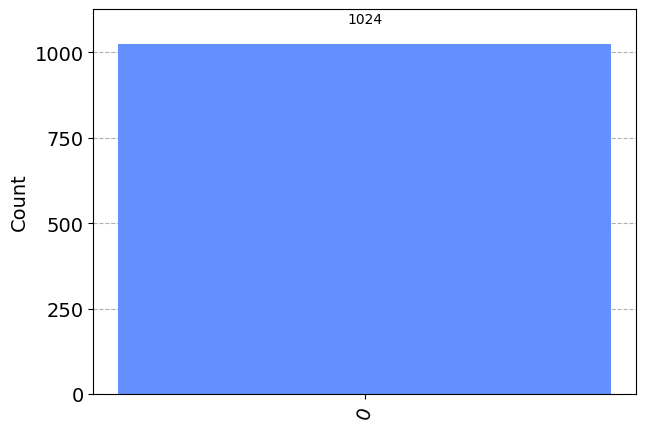

In [4]:
job = execute(circuit, backend=simulator, shots=1024)
result = job.result()
counts = result.get_counts()
plot_histogram(counts)

Sure enough, zero is measured 1024 times. Again, this is due to us only performing a classical operation within a Quantum system.

### Bell States (Entanglement Example)

The code below shows the construction

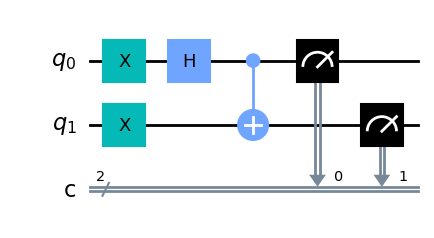

In [11]:
circuit = QuantumCircuit(2, 2)
circuit.x(0)
circuit.x(1)
circuit.h(0)
circuit.cnot(0, 1)
circuit.measure([0,1], [0,1])

circuit.draw(output="mpl")

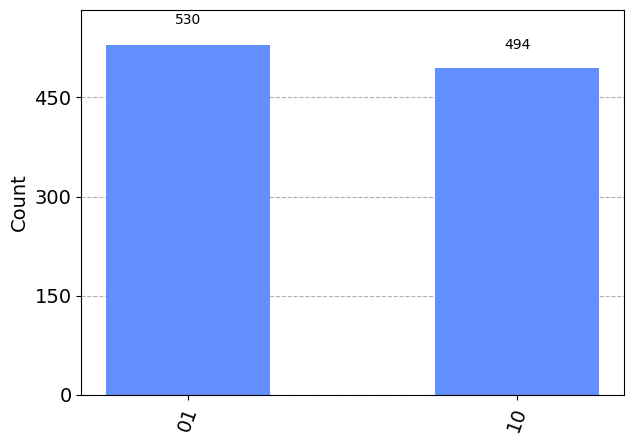

In [10]:
job = execute(circuit, backend=simulator, shots=1024)
result = job.result()
counts = result.get_counts()
plot_histogram(counts)

#### Exercise 1: What are the other Bell States? 

Try creating another Bell State! Most of the code below has been written for you, only the actual gates needed have been left out.

In [ ]:
# Circuit Initialization
circuit = QuantumCircuit(2, 2)

#TODO: Add gates here to create another Bell state
# Hint: .x() can be used to add a not gate to your circuit


# Measure and Draw
circuit.measure([0,1], [0,1])
circuit.draw(output="mpl")

In [ ]:
job = execute(circuit, backend=simulator, shots=1024)
result = job.result()
counts = result.get_counts()
plot_histogram(counts)

### Grover's Algorithm: A Quantum Algorithm that Could Change Unstructured Searching

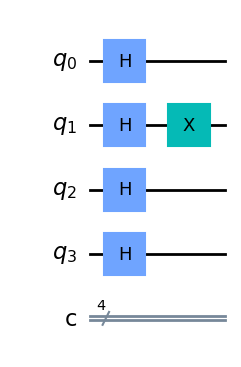

In [8]:
def apply_hadamard_to_all_qubits(circuit):
    for i in range(0, circuit.num_qubits):
        circuit.h(i)
        
def apply_oracle(circuit, qubit_index):
    circuit.x(qubit_index)
    
    
        
circuit = QuantumCircuit(4, 4)
apply_hadamard_to_all_qubits(circuit)
apply_oracle(circuit, 1)
circuit.draw(output="mpl")

### Exercise Two: Using Ying's Quantum Floyd-Hoare Logic 

In the slides, you saw that we were able to show that applying a Hadamard gate to a single qubit is a valid quantum operation (and results in a valid quantum state). 

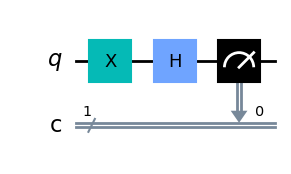

In [6]:
circuit = QuantumCircuit(1,1)
circuit.x(0)
circuit.h(0)
circuit.measure(0, 0)
circuit.draw(output="mpl")

Try writing a statement similar to the example for the above circuit.

### Floyd-Hoare Verification with Hoare Type Theory for a Bell State

The example below demonstrates the initialization, application of gates, and measurement of the Bell state example shown above. Notice how the notation can be made to be less verbose. We could expand thes statements if we wanted to.

$$ 
bell_{00}: unit \rightarrow QST (a, b): (qbit \times qbit) \newline
        \; (requires \{T\})\newline
        \; \; (ensures \{(a,b) = \beta_{00} \})
$$
$$
\newline
\newline
$$


$$ bell_{00} = do \newline
\; 
        \; a \leftarrow init 0 \newline
        \; apply \; H \;  to \; a \newline
        \; b \leftarrow \;init 0 \newline
        \; apply CX to (a, b) \newline
        \; return (a, b) \newline        
$$

#### Exercise Three: Floyd-Hoare Verification with Hoare Type Theory for your Bell State

Try writing the Bell state you made in Exercise 1 using the notation above. Want more of a challenge? Try writing out the oracle used in our Grover's algorithm example above.

### Bibliography
[1] IBM Research (2023), IBM Technology Atlas, IBM Quantum Roadmap, https://www.ibm.com/roadmaps/quantum/

[2] IBM Quantum Learning (2024), Qiskit, https://www.ibm.com/quantum/qiskit

[3] Xanadu (2022), I.1 All About Qubits, https://codebook.xanadu.ai/I.1

[4] IBM Quantum Learning (2023), Quantum Circuits, https://learning.quantum.ibm.com/course/basics-of-quantum-information/quantum-circuits

[5]


https://www.ibm.com/topics/quantum-computing
https://learning.quantum.ibm.com
https://www.ibm.com/quantum/research